In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
jsonl_path="data/20240919152121_llm_gen.jsonl"
df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate
0,-61.00,"N,N-Dimethylformamide",CN(C)C=O,Melting temperature,[oC],170.0,To predict the melting temperature of Compound...,3.786885
1,77.00,4-pyrimidinemethanol,c1cncnc1CO,Melting temperature,[oC],105.0,To predict the melting temperature of Compound...,0.363636
2,67.00,2-cyanobenzenesulfonyl chloride,c1ccc(c(c1)C#N)S(=O)(=O)Cl,Melting temperature,[oC],129.0,To predict the melting temperature of Compound...,0.925373
3,131.00,"6-chloro-2,3-dihydro-3-oxo-4h-1,4-benzoxazine-...",c1cc2c(cc1Cl)N(C(=O)CO2)CCC#N,Melting temperature,[oC],130.5,To predict the melting temperature of 6-chloro...,0.003817
4,104.25,"1,3-cyclohexanedione",C1CC(=O)CC(=O)C1,Melting temperature,[oC],50.0,Compound X consists of two carbonyl groups att...,0.520384
...,...,...,...,...,...,...,...,...
4208,-100.00,"1,2-Dichloro-Propane",C[C@@H](Cl)CCl,Melting temperature,[oC],-42.0,To predict the melting temperature of Compound...,0.580000
4209,40.50,"2,2,3-trimethyl-cyclopent-3-enecarboxylic acid",OC(=O)C1CC=C(C)C1(C)C,Melting temperature,[oC],185.0,To predict the melting temperature of Compound...,3.567901
4210,143.00,(4E)-2-(hydroxymethyl)-4-[(4-methoxyphenyl)hyd...,FC(F)(F)C1=NN(CO)C(=O)C1=NNc1ccc(OC)cc1,Melting temperature,[oC],48.0,To predict the melting temperature of Compound...,0.664336
4211,78.00,"4-(2,5-dimethylphenyl)-2,2-dimethylbutanoic acid",O=C(O)C(C)(C)CCc1cc(C)ccc1C,Melting temperature,[oC],125.0,To predict the melting temperature of Compound...,0.602564


<Axes: xlabel='error_rate', ylabel='Count'>

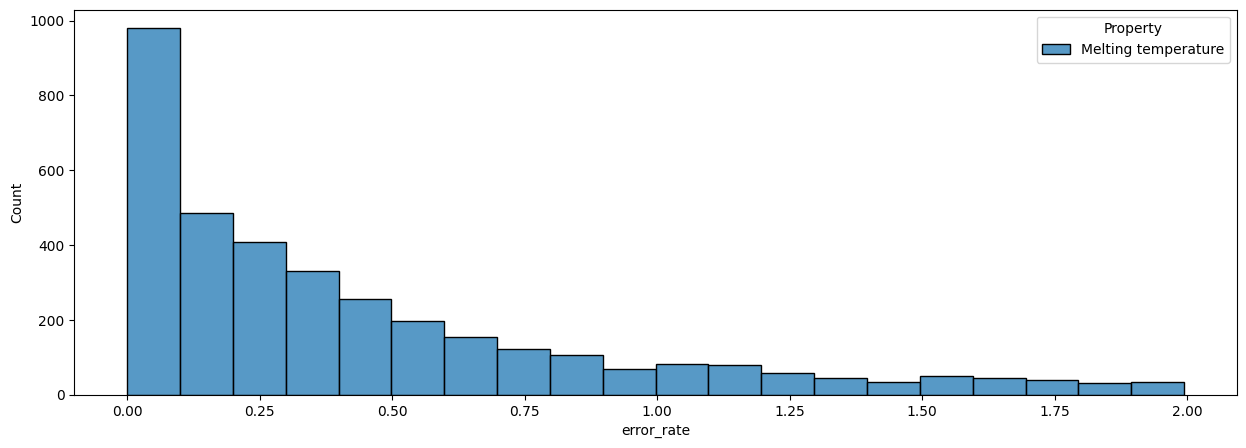

In [27]:
plt.figure(figsize=(15, 5))
sns.histplot(df[df["error_rate"]<2], x="error_rate", hue="Property", multiple="stack", 
             bins=20)

In [28]:
for t in sorted(list(set(df["Property"]))):
    print(t)

Melting temperature


In [29]:

df["error_rate"].median()

0.36612021857923505

In [30]:

error_threshold=0.1
max_records=200

df=pd.read_json(jsonl_path,lines=True)
df=df.drop(columns=["record","prompt"])
df=df.sort_values(by="error_rate")
df["cond"]=df["CompoundName"]+" "+df["SMILES"]+" "+df["Property"]
df=df.drop_duplicates(subset=["cond"])
df=df[df["error_rate"]<error_threshold]
df

,actual_value,CompoundName,SMILES,Property,Unit,predicted,reason,error_rate,cond
2028,67.0,"3,3-dimethylacrylic acid",CC(=CC(=O)O)C,Melting temperature,[oC],67.0,To predict the melting temperature of Compound...,0.000000,"3,3-dimethylacrylic acid CC(=CC(=O)O)C Melting..."
2594,155.0,"3,3-dibromo-1,8,8-trimethylbicyclo[3.2.1]octan...",BrC1(Br)C(=O)C2CCC(C)(C1=O)C2(C)C,Melting temperature,[oC],155.0,To predict the melting temperature of Compound...,0.000000,"3,3-dibromo-1,8,8-trimethylbicyclo[3.2.1]octan..."
2601,-96.0,3-ethyltoluene,CCc1cccc(c1)C,Melting temperature,[oC],-96.0,To predict the melting temperature of Compound...,0.000000,3-ethyltoluene CCc1cccc(c1)C Melting temperature
234,-60.0,tetrakis(dimethylsiloxy)silane,C[SiH](C)O[Si](O[SiH](C)C)(O[SiH](C)C)O[SiH](C)C,Melting temperature,[oC],-60.0,To predict the melting temperature of Compound...,0.000000,tetrakis(dimethylsiloxy)silane C[SiH](C)O[Si](...
238,130.0,dimesitylmethane,Cc1cc(c(c(c1)C)Cc2c(cc(cc2C)C)C)C,Melting temperature,[oC],130.0,"To predict the melting point of Compound X, le...",0.000000,dimesitylmethane Cc1cc(c(c(c1)C)Cc2c(cc(cc2C)C...
...,...,...,...,...,...,...,...,...,...
1302,246.0,2-hydroxy-5-nitronicotinic acid,c1c(cnc(c1C(=O)O)O)[N+](=O)[O-],Melting temperature,[oC],270.0,To predict the melting temperature of Compound...,0.097561,2-hydroxy-5-nitronicotinic acid c1c(cnc(c1C(=O...
1732,133.0,2-ethoxybenzamide,CCOc1ccccc1C(=O)N,Melting temperature,[oC],120.0,To predict the melting temperature of Compound...,0.097744,2-ethoxybenzamide CCOc1ccccc1C(=O)N Melting te...
3560,182.0,thiophen-2-carboxamide,NC(=O)c1cccs1,Melting temperature,[oC],200.0,"Considering the structure of Compound X, we ca...",0.098901,thiophen-2-carboxamide NC(=O)c1cccs1 Melting t...
2648,212.0,"6-methoxy-2,3-diphenyl-1H-indole",O(C)C=1C=CC=2C(=NC(c3ccccc3)C=2c2ccccc2)C=1,Melting temperature,[oC],233.0,"To predict the melting point of Compound X, we...",0.099057,"6-methoxy-2,3-diphenyl-1H-indole O(C)C=1C=CC=2..."
